In [1]:
from sklearn.datasets import load_breast_cancer, fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import GridSearchCV

## Breast Cancer Classification

In [3]:
data = load_breast_cancer()
y = data.target * -1 + 1 # inverting the data
X_train, X_test, y_train, y_test = train_test_split(data.data, y)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [4]:
X_train.shape

(426, 30)

In [5]:
def model_funk(input_dim=30, layer_one_neurons=30, layer_two_neurons=20): # setting up parameter here 
    model = Sequential()
    model.add(Dense(layer_one_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
ff_model = KerasClassifier(build_fn=model_funk, verbose=0, input_dim=X_train.shape[1])

params = {'epochs': [10],
         'batch_size': [50],
         'layer_one_neurons': [10,20,30],
         'layer_two_neurons': [30,50]
         }

gs = GridSearchCV(ff_model, param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002D959C64828>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [10], 'batch_size': [50], 'layer_one_neurons': [10, 20, 30], 'layer_two_neurons': [30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
print(gs.best_score_)
print(gs.best_params_)

0.957746465721
{'batch_size': 50, 'epochs': 10, 'layer_one_neurons': 20, 'layer_two_neurons': 50}


# Pipeline steps with Grid Search

In [8]:
steps = [('Standard_scale', StandardScaler()),
        ('Keras_Classifier', ff_model)]

pipe = Pipeline(steps)

## Riley's code

In [9]:
def model_funk(input_dim=30, layer_one_neurons=30, layer_two_neurons=20):
    model = Sequential()
    model.add(Dense(layer_one_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model




ff_model = KerasClassifier(build_fn=model_funk, verbose=0, input_dim=X_train.shape[1])


pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ff_model', ff_model)
])


params = {
    'ff_model__epochs': [5],
    'ff_model__batch_size': [50],
    'ff_model__layer_one_neurons': [20, 30],
    'ff_model__layer_two_neurons': [30, 50]
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.941314548114
{'ff_model__batch_size': 50, 'ff_model__epochs': 5, 'ff_model__layer_one_neurons': 30, 'ff_model__layer_two_neurons': 30}


## CNN Network (Convulsional Neural Network)

In [10]:
data = fetch_lfw_people(min_faces_per_person=70)

y = to_categorical(data.target)

X_train, X_test, y_train, y_test = train_test_split(data.data, y)
X_train = X_train.reshape(X_train.shape[0], 62, 47, 1)
X_test = X_test.reshape(X_test.shape[0], 62, 47,1)

In [11]:
X_train = X_train/255 # standardizing data on images
X_test = X_test/255

array([[[ 253.66667175],
        [ 254.33332825],
        [ 253.66667175],
        ..., 
        [  56.33333206],
        [  46.66666794],
        [  39.        ]],

       [[ 254.        ],
        [ 254.        ],
        [ 253.        ],
        ..., 
        [  58.        ],
        [  48.33333206],
        [  40.66666794]],

       [[ 250.        ],
        [ 247.        ],
        [ 243.33332825],
        ..., 
        [  56.66666794],
        [  48.33333206],
        [  42.33333206]],

       ..., 
       [[  73.33333588],
        [  58.        ],
        [  39.66666794],
        ..., 
        [  94.33333588],
        [  91.33333588],
        [  86.66666412]],

       [[  65.66666412],
        [  51.66666794],
        [  37.33333206],
        ..., 
        [  90.66666412],
        [  90.33333588],
        [  85.33333588]],

       [[  60.        ],
        [  50.        ],
        [  37.66666794],
        ..., 
        [  87.        ],
        [  88.        ],
        [  86.6666

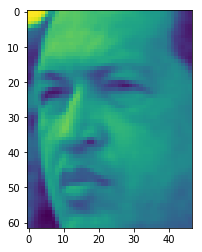

In [12]:
plt.imshow(data.images[0])

data.images[0].shape

data.data[0].reshape(62,47,1) # the third number refers to depth

In [13]:
y_train.shape[1] #Neurons needed

7

In [14]:
X_train.shape

(966, 62, 47, 1)

In [15]:
model = Sequential()
model.add(Conv2D(15, (15,5), input_shape=(62,47,1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(30, (4,4), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 966 samples, validate on 322 samples
Epoch 1/5
966/966 [==============================] - 4s 4ms/step - loss: 1.7519 - acc: 0.3923 - val_loss: 1.6672 - val_acc: 0.4565
Epoch 2/5
966/966 [==============================] - 4s 4ms/step - loss: 1.6967 - acc: 0.3965 - val_loss: 1.6373 - val_acc: 0.4565
Epoch 3/5
966/966 [==============================] - 4s 4ms/step - loss: 1.6839 - acc: 0.3965 - val_loss: 1.5817 - val_acc: 0.4565
Epoch 4/5
966/966 [==============================] - 4s 4ms/step - loss: 1.6198 - acc: 0.4037 - val_loss: 1.4532 - val_acc: 0.4969
Epoch 5/5
966/966 [==============================] - 4s 4ms/step - loss: 1.5117 - acc: 0.4410 - val_loss: 1.3158 - val_acc: 0.5186


# CNN using Kaggle dataset on digits

In [18]:
import pandas as pd
df = pd.read_csv('train.csv')

In [19]:
test = pd.read_csv('test (1).csv')

In [20]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.label

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [23]:
y = to_categorical(df['label'].values)

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]].values, y)

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

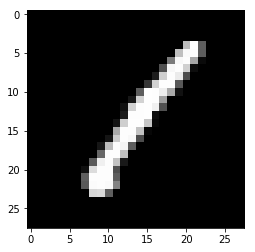

In [24]:
plt.imshow(df.iloc[0, 1:].values.reshape(28, 28), cmap=plt.cm.gray)

In [25]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'))

In [26]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(30, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D((2,2)))

In [27]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(30, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(45, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 22s 683us/step - loss: 0.3364 - acc: 0.8969 - val_loss: 0.1245 - val_acc: 0.9618
Epoch 2/5
31500/31500 [==============================] - 22s 687us/step - loss: 0.1017 - acc: 0.9683 - val_loss: 0.0681 - val_acc: 0.9790
Epoch 3/5
31500/31500 [==============================] - 21s 670us/step - loss: 0.0720 - acc: 0.9777 - val_loss: 0.0804 - val_acc: 0.9759
Epoch 4/5
31500/31500 [==============================] - 22s 702us/step - loss: 0.0539 - acc: 0.9834 - val_loss: 0.0459 - val_acc: 0.9860
Epoch 5/5
31500/31500 [==============================] - 21s 665us/step - loss: 0.0438 - acc: 0.9864 - val_loss: 0.0567 - val_acc: 0.9819


# Preprocessing the test data

In [28]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test.shape

(28000, 784)

In [30]:
test = test/255

In [31]:
test = test.values.reshape(test.shape[0], 28, 28,1)

In [32]:
pred = model.predict_classes(test)

28000/28000 [==============================] - 6s 222us/step


In [33]:
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [34]:
submission = pd.DataFrame()
submission['Label'] = pred
submission['ImageId'] = range(1,test.shape[0] + 1)

In [37]:
submission.to_csv('submission.csv', index=False)

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 15)        390       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 15)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 30)          7230      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 45)          12195     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 45)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 45)                0         
__________